# Lab 2 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in CSV here
data = pd.read_csv("out.csv")
print(data)

       step                 fitness  \
0         0   4.850922814068814e-07   
1         0     0.10098763124451712   
2         0    0.034163300333170527   
3         0     0.08106154584395911   
4         0  0.00021755444663989042   
...     ...                     ...   
518304   29      0.9977392577751664   
518305   29      0.9988844433599874   
518306   29      0.9997962997376448   
518307   29      0.9990909341543588   
518308   29      0.9988755117488651   

                                                   genome   N   p_m  p_c  \
0       [0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1...  25     0    0   
1       [1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0...  25     0    0   
2       [1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0...  25     0    0   
3       [1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0...  25     0    0   
4       [0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1...  25     0    0   
...                                                   ...  ..   ...  ...   

In [3]:
# create new dataframes for master csv
new_data = pd.DataFrame(columns=['N', 'p_m', 'p_c', 'tournament_size', 'iteration', 'generation', 'average_fitness', 'best_fitness', 'best_genome', 'solution_found', 'num_solutions_found'])
print(new_data)
new_data2 = pd.DataFrame(columns=['N', 'p_m', 'p_c', 'tournament_size', 'iteration', 'generation', 'average_fitness', 'best_fitness', 'best_genome', 'solution_found', 'num_solutions_found'])
print(new_data2)

Empty DataFrame
Columns: [N, p_m, p_c, tournament_size, iteration, generation, average_fitness, best_fitness, best_genome, solution_found, num_solutions_found]
Index: []
Empty DataFrame
Columns: [N, p_m, p_c, tournament_size, iteration, generation, average_fitness, best_fitness, best_genome, solution_found, num_solutions_found]
Index: []


In [4]:
# for every experiment/iteration for the 
# original 
for x in range(1,257):   
    c = str(x)
    data2 = data.loc[data["experiment"] == c]
    data2.reset_index(drop=True, inplace=True)
    # for every step/generation
    for y in range(0,30):
        c = str(y)
        data1 = data2.loc[data2["step"] == c]
        data1.reset_index(drop=True, inplace=True)

        # extract N, pm, pc, and trny size
        N = int(data1["N"][1])
        p_m = float(data1["p_m"][1])
        p_c = float(data1["p_c"][1])
        trn = int(data1["trn_size"][1])
        
        fitnesses = []
        col = data1["fitness"]
        max_index = 0
        max_fit = 0
        num_sol = 0
        i = 0
        for f in col:
            i += 1
            if f != '': fitnesses.append(float(f))
            if float(f) > max_fit:
                max_fit = float(f)
                max_index = i-1
            if float(f) == 1:
                num_sol += 1
        
        avg_fit = np.mean(fitnesses)
        best_genome = data1.loc[max_index,"genome"]
        sol_found = False
        if max_fit == 1:
            sol_found = True
        
        # add to new dataframe
        list_row = [int(N), float(p_m), float(p_c), int(trn), x, y, float(avg_fit), float(max_fit), best_genome, sol_found, int(num_sol)]
        new_data.loc[len(new_data)] = list_row

    

In [5]:
print(new_data)

        N   p_m  p_c  tournament_size  iteration  generation  average_fitness  \
0      25  0.00  0.0                2          1           0         0.041100   
1      25  0.00  0.0                2          1           1         0.049046   
2      25  0.00  0.0                2          1           2         0.062750   
3      25  0.00  0.0                2          1           3         0.106946   
4      25  0.00  0.0                2          1           4         0.146693   
...   ...   ...  ...              ...        ...         ...              ...   
7675  100  0.05  0.5                5        256          25         0.835384   
7676  100  0.05  0.5                5        256          26         0.817128   
7677  100  0.05  0.5                5        256          27         0.827303   
7678  100  0.05  0.5                5        256          28         0.805236   
7679  100  0.05  0.5                5        256          29         0.814776   

      best_fitness         

In [6]:
print(new_data.loc[new_data["solution_found"] == True])

       N   p_m  p_c  tournament_size  iteration  generation  average_fitness  \
4887  75  0.03  0.0                4        163          27         0.874670   
4888  75  0.03  0.0                4        163          28         0.874973   
5505  75  0.05  0.1                5        184          15         0.870851   

      best_fitness                                        best_genome  \
4887           1.0  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
4888           1.0  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
5505           1.0  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   

      solution_found  num_solutions_found  
4887            True                    1  
4888            True                    2  
5505            True                    1  


In [7]:
# now do it for the 20 random
# population sizes

for x in range(257,277):   
    c = str(x)
    data2 = data.loc[data["experiment"] == c]
    data2.reset_index(drop=True, inplace=True)
    # for every step/generation
    for y in range(0,30):
        c = str(y)
        data1 = data2.loc[data2["step"] == c]
        data1.reset_index(drop=True, inplace=True)

        # extract N, pm, pc, and trny size
        N = int(data1["N"][1])
        p_m = float(data1["p_m"][1])
        p_c = float(data1["p_c"][1])
        trn = int(data1["trn_size"][1])
        
        fitnesses = []
        col = data1["fitness"]
        max_index = 0
        max_fit = 0
        num_sol = 0
        i = 0
        for f in col:
            i += 1
            if f != '': fitnesses.append(float(f))
            if float(f) > max_fit:
                max_fit = float(f)
                max_index = i-1
            if float(f) == 1:
                num_sol += 1

        avg_fit = np.mean(fitnesses)
        best_genome = data1.loc[max_index,"genome"]
        sol_found = False
        if max_fit == 1:
            sol_found = True
        
        # add to new dataframe
        list_row = [int(N), float(p_m), float(p_c), int(trn), x, y, float(avg_fit), float(max_fit), best_genome, sol_found, int(num_sol)]
        new_data2.loc[len(new_data2)] = list_row

In [83]:
new_data2 = new_data2.sort_values('N')

## combining data frames
new_data3 = pd.concat([new_data, new_data2], axis=0)
print(new_data3)

      N   p_m  p_c  tournament_size  iteration  generation  average_fitness  \
0    25  0.00  0.0                2          1           0         0.041100   
1    25  0.00  0.0                2          1           1         0.049046   
2    25  0.00  0.0                2          1           2         0.062750   
3    25  0.00  0.0                2          1           3         0.106946   
4    25  0.00  0.0                2          1           4         0.146693   
..   ..   ...  ...              ...        ...         ...              ...   
348  90  0.01  0.3                2        268          18         0.917436   
347  90  0.01  0.3                2        268          17         0.963184   
330  90  0.01  0.3                2        268           0         0.152669   
351  90  0.01  0.3                2        268          21         0.972058   
358  90  0.01  0.3                2        268          28         0.963827   

     best_fitness                                  

# FIGURES
## Population

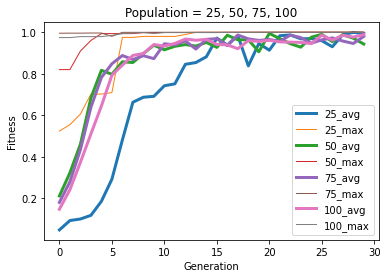

In [78]:
# x -> generation
# y -> average fitness
df3 = new_data.loc[new_data["N"] == 25]
df4 = df3.loc[(df3["p_m"] == 0.01) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X = list(df4["generation"])
Y = list(df4["average_fitness"])
Y_1 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["N"] == 50]
df4 = df3.loc[(df3["p_m"] == 0.01) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X_1 = list(df4["generation"])
Y_2 = list(df4["average_fitness"])
Y_3 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["N"] == 75]
df4 = df3.loc[(df3["p_m"] == 0.01) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X_2 = list(df4["generation"])
Y_4 = list(df4["average_fitness"])
Y_5 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["N"] == 100]
df4 = df3.loc[(df3["p_m"] == 0.01) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X_3 = list(df4["generation"])
Y_6 = list(df4["average_fitness"])
Y_7 = list(df4["best_fitness"])

plt.plot(X, Y, linewidth = 3, label = '25_avg')
plt.plot(X_1, Y_1, linewidth = 1, label = '25_max')
plt.plot(X_2, Y_2, linewidth = 3, label = '50_avg')
plt.plot(X_3, Y_3, linewidth = 1, label = '50_max')
plt.plot(X_4, Y_4, linewidth = 3, label = '75_avg')
plt.plot(X_4, Y_5, linewidth = 1, label = '75_max')
plt.plot(X_5, Y_6, linewidth = 3, label = '100_avg')
plt.plot(X_5, Y_7, linewidth = 1, label = '100_max')

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Population = 25, 50, 75, 100")
plt.show()

## Mutation probability

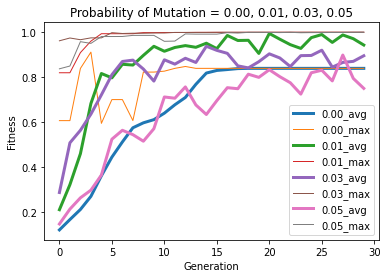

In [79]:
# x -> generation
# y -> average fitness
df3 = new_data.loc[new_data["p_m"] == 0.0]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X = list(df4["generation"])
Y = list(df4["average_fitness"])
Y_1 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["p_m"] == 0.01]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X_1 = list(df4["generation"])
Y_2 = list(df4["average_fitness"])
Y_3 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["p_m"] == 0.03]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X_2 = list(df4["generation"])
Y_4 = list(df4["average_fitness"])
Y_5 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["p_m"] == 0.05]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_c"] == 0.3) & (df3["tournament_size"] == 2)] 

X_3 = list(df4["generation"])
Y_6 = list(df4["average_fitness"])
Y_7 = list(df4["best_fitness"])

plt.plot(X, Y, linewidth = 3, label = '0.00_avg')
plt.plot(X_1, Y_1, linewidth = 1, label = '0.00_max')
plt.plot(X_2, Y_2, linewidth = 3, label = '0.01_avg')
plt.plot(X_3, Y_3, linewidth = 1, label = '0.01_max')
plt.plot(X_4, Y_4, linewidth = 3, label = '0.03_avg')
plt.plot(X_4, Y_5, linewidth = 1, label = '0.03_max')
plt.plot(X_5, Y_6, linewidth = 3, label = '0.05_avg')
plt.plot(X_5, Y_7, linewidth = 1, label = '0.05_max')

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Probability of Mutation = 0.00, 0.01, 0.03, 0.05")
plt.show()

## Probability of uniform crossover

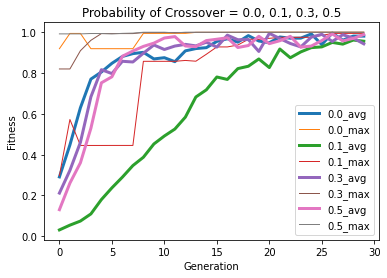

In [80]:
# x -> generation
# y -> average fitness
df3 = new_data.loc[new_data["p_c"] == 0.0]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["tournament_size"] == 2)] 

X = list(df4["generation"])
Y = list(df4["average_fitness"])
Y_1 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["p_c"] == 0.1]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["tournament_size"] == 2)] 

X_1 = list(df4["generation"])
Y_2 = list(df4["average_fitness"])
Y_3 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["p_c"] == 0.3]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["tournament_size"] == 2)] 

X_2 = list(df4["generation"])
Y_4 = list(df4["average_fitness"])
Y_5 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["p_c"] == 0.5]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["tournament_size"] == 2)] 

X_3 = list(df4["generation"])
Y_6 = list(df4["average_fitness"])
Y_7 = list(df4["best_fitness"])

plt.plot(X, Y, linewidth = 3, label = '0.0_avg')
plt.plot(X_1, Y_1, linewidth = 1, label = '0.0_max')
plt.plot(X_2, Y_2, linewidth = 3, label = '0.1_avg')
plt.plot(X_3, Y_3, linewidth = 1, label = '0.1_max')
plt.plot(X_4, Y_4, linewidth = 3, label = '0.3_avg')
plt.plot(X_4, Y_5, linewidth = 1, label = '0.3_max')
plt.plot(X_5, Y_6, linewidth = 3, label = '0.5_avg')
plt.plot(X_5, Y_7, linewidth = 1, label = '0.5_max')

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Probability of Crossover = 0.0, 0.1, 0.3, 0.5")
plt.show()

## Tournament Size

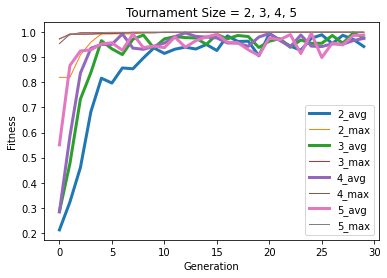

In [81]:
# x -> generation
# y -> average fitness
df3 = new_data.loc[new_data["tournament_size"] == 2]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["p_c"] == 0.3)] 

X = list(df4["generation"])
Y = list(df4["average_fitness"])
X_1 = list(df4["generation"])
Y_1 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["tournament_size"] == 3]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["p_c"] == 0.3)] 

X_2= list(df4["generation"])
Y_2 = list(df4["average_fitness"])
X_3 = list(df4["generation"])
Y_3 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["tournament_size"] == 4]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["p_c"] == 0.3)] 

X_4= list(df4["generation"])
Y_4 = list(df4["average_fitness"])
Y_5 = list(df4["best_fitness"])

df3 = new_data.loc[new_data["tournament_size"] == 5]
df4 = df3.loc[(df3["N"] == 50) & (df3["p_m"] == 0.01) & (df3["p_c"] == 0.3)]

X_5= list(df4["generation"])
Y_6 = list(df4["average_fitness"])
Y_7 = list(df4["best_fitness"])

plt.plot(X, Y, linewidth = 3, label = '2_avg')
plt.plot(X_1, Y_1, linewidth = 1, label = '2_max')
plt.plot(X_2, Y_2, linewidth = 3, label = '3_avg')
plt.plot(X_3, Y_3, linewidth = 1, label = '3_max')
plt.plot(X_4, Y_4, linewidth = 3, label = '4_avg')
plt.plot(X_4, Y_5, linewidth = 1, label = '4_max')
plt.plot(X_5, Y_6, linewidth = 3, label = '5_avg')
plt.plot(X_5, Y_7, linewidth = 1, label = '5_max')

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Tournament Size = 2, 3, 4, 5")
plt.show()

## Export to CSV

In [85]:
new_data3.to_csv("master_data.csv", encoding='utf-8', index=False)


### Heatmaps

[[0.77800187 0.87526271 0.82022008 0.74062964]
 [0.8278842  0.86542037 0.80731765 0.74457953]
 [0.85764273 0.88314097 0.82444749 0.75013981]
 [0.91806335 0.89629467 0.82259664 0.74318998]]


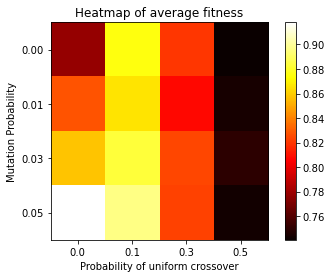

In [93]:
## Heatmap
crss = [0.0,0.1,0.3,0.5]
muts = [0.00,0.01,0.03,0.05]

lis1 = []
mean_fit = []

# format array to 2D for graph
for x in crss:
    lis1 = []
    for y in muts:
        df7 = new_data.loc[(new_data["p_m"] == y) & (new_data["p_c"] == x)]
        d8 = df7["average_fitness"]
        lis1.append(np.mean(d8))
    mean_fit.append(lis1)
    
mean_fit = np.array(mean_fit)
mean_fit = mean_fit.reshape(4, 4)
print(mean_fit)

# print heatmap of accuracies
plt.imshow(mean_fit, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(0,4,step=1), ["0.0","0.1","0.3","0.5"])
plt.yticks(np.arange(0,4,step=1), ["0.00","0.01","0.03","0.05"])
plt.colorbar()
plt.title("Heatmap of average fitness")
plt.xlabel("Probability of uniform crossover")
plt.ylabel("Mutation Probability")
plt.show()

[[0.68851348 0.79039063 0.82875022 0.77494312]
 [0.76411724 0.82209344 0.85491515 0.87440303]
 [0.80998145 0.83220561 0.84663311 0.87172406]
 [0.79759294 0.84709481 0.86742313 0.88405025]]


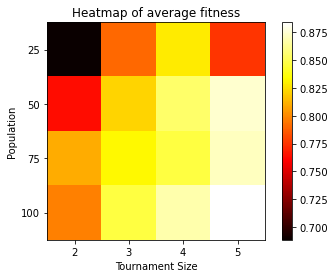

In [98]:
## Heatmap
pops = [25,50,75,100]
trns = [2,3,4,5]

lis1 = []
mean_fit = []

# format array to 2D for graph
for x in pops:
    lis1 = []
    for y in trns:
        df7 = new_data.loc[(new_data["tournament_size"] == y) & (new_data["N"] == x)]
        d8 = df7["average_fitness"]
        lis1.append(np.mean(d8))
    mean_fit.append(lis1)
    
mean_fit = np.array(mean_fit)
#mean_fit = mean_fit.reshape(4, 4)
print(mean_fit)

# print heatmap of accuracies
plt.imshow(mean_fit, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(0,4,step=1), ["2","3","4","5"])
plt.yticks(np.arange(0,4,step=1), ["25","50","75","100"])
plt.colorbar()
plt.title("Heatmap of average fitness")
plt.xlabel("Tournament Size")
plt.ylabel("Population")
plt.show()